In [14]:
import os
import numpy as np

from skimage import io
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

import matplotlib.pyplot as plt

In [3]:
data_path = "C:/Users/Sadek/Documents/GitHub/Project/offline-signature/data"

def display_image(image, cmap='gray'):
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.title("Shape: {}".format(image.shape))
    plt.show()

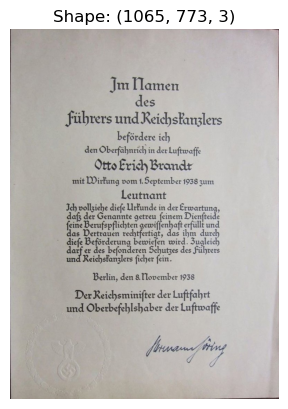

In [30]:
image_path = os.path.join(data_path + "/input/doc1.jpg")
# Read the image
image = io.imread(image_path)
# Plot the image
display_image(image)

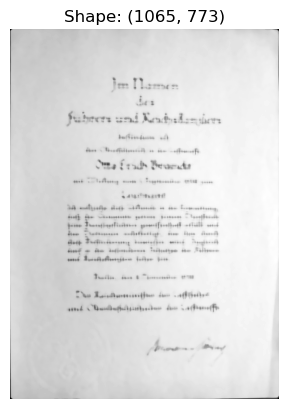

In [37]:
gray_img = rgb2gray(image)

# Estimate the 'background' color by a median filter
from scipy import signal
bg = signal.medfilt2d(gray_img, (11,11))

display_image(bg)

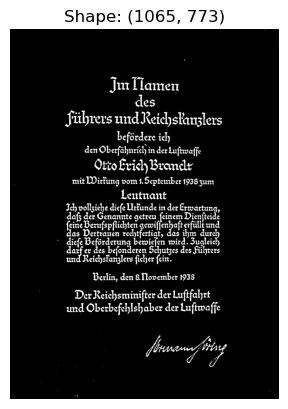

In [45]:
binary_mask = gray_img < bg - 0.1
display_image(binary_mask)

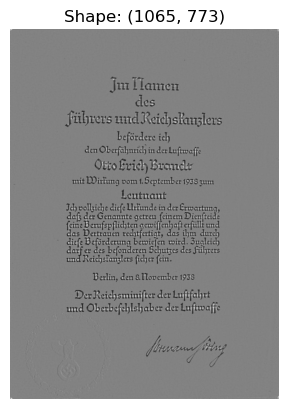

In [35]:
# Subtract the background from the original image
img_sub = gray_img - bg
display_image(img_sub)

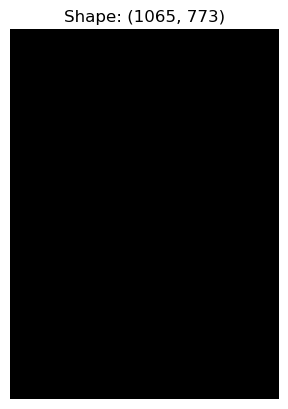

In [36]:
# Convert the image to grayscale
# image_gray = rgb2gray(image)
# Threshold the image using Otsu's method
thresh_val = threshold_otsu(img_sub)
mask = (image_gray > thresh_val).astype(np.uint8)
display_image(mask)

yes


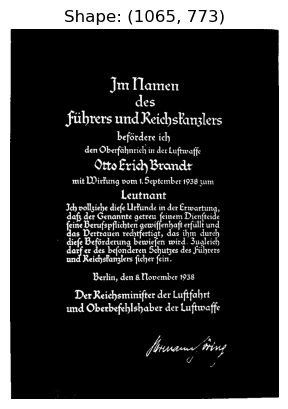

In [16]:
# Make sure the larger portion of the mask is considered background
if np.sum(mask == 0) < np.sum(mask == 1):
    mask = 1 - mask
    print("yes")
display_image(mask)

In [46]:
from skimage import measure
from scipy import ndimage

# Use the 'ndimage.label' function to identify and label all connected components in the binary image 'mask'
labels, nlabels = ndimage.label(binary_mask)
props = measure.regionprops(labels, image)


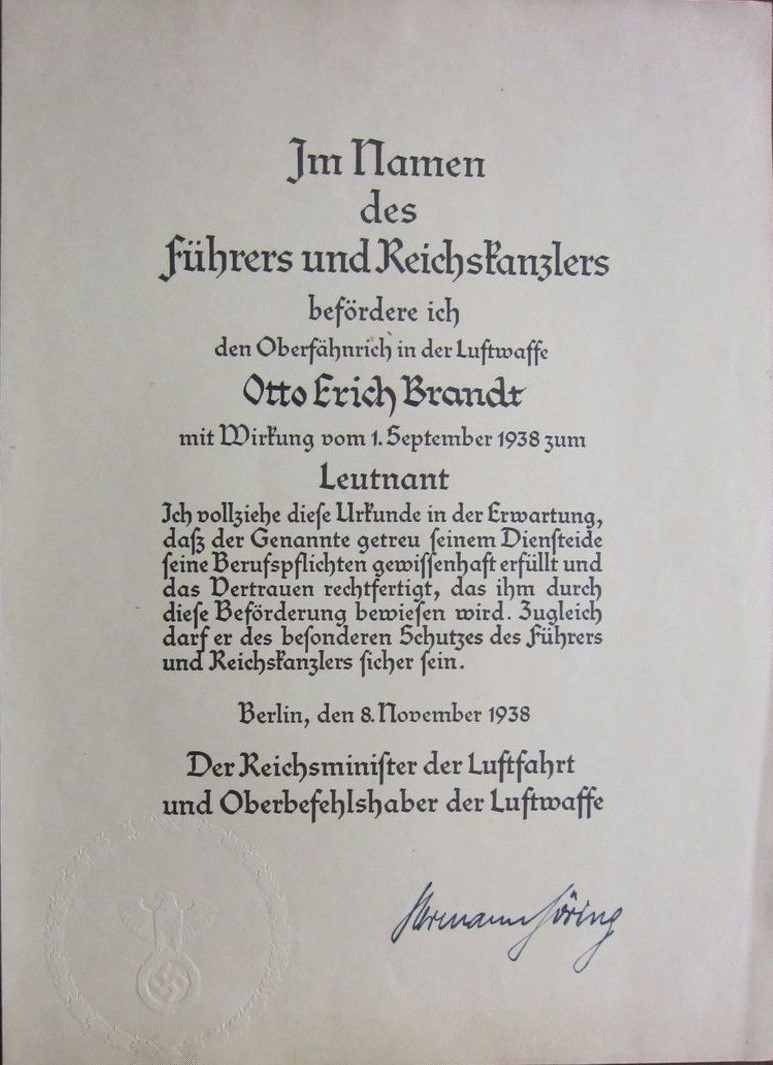

In [47]:
import plotly
import plotly.express as px
import plotly.graph_objects as go

fig = px.imshow(image, binary_string=True)
fig.update_traces(hoverinfo='skip') # hover is only for label info

properties = ['area', 'eccentricity', 'perimeter', 'intensity_mean']

# For each label, add a filled scatter trace for its contour,
# and display the properties of the label in the hover of this trace.
for index in range(labels.max()):
    label_i = props[index].label
    contour = measure.find_contours(labels == label_i, 0.5)[0]
    y, x = contour.T
    hoverinfo = ''
    for prop_name in properties:
        prop_value = getattr(props[index], prop_name)
        if type(prop_value) == np.ndarray:
            prop_value = prop_value[0]
        hoverinfo += f'<b>{prop_name}: {prop_value:.2f}</b><br>'
    fig.add_trace(go.Scatter(
        x=x, y=y, name=label_i,
        mode='lines', fill='toself', showlegend=False,
        hovertemplate=hoverinfo, hoveron='points+fills'))

plotly.io.show(fig)